# Utmaning: Analysera text om datavetenskap

> *I den här notebooken experimenterar vi med att använda olika URL:er - Wikipedia-artikeln om maskininlärning. Du kan se att, till skillnad från datavetenskap, innehåller den här artikeln många termer, vilket gör analysen mer problematisk. Vi behöver komma på ett annat sätt att städa upp data efter att ha gjort nyckelordsutvinning, för att bli av med vissa frekventa, men inte meningsfulla, ordkombinationer.*

I det här exemplet ska vi göra en enkel övning som täcker alla steg i en traditionell datavetenskapsprocess. Du behöver inte skriva någon kod, du kan bara klicka på cellerna nedan för att köra dem och observera resultatet. Som en utmaning uppmuntras du att testa den här koden med olika data.

## Mål

I den här lektionen har vi diskuterat olika koncept relaterade till datavetenskap. Låt oss försöka upptäcka fler relaterade koncept genom att göra lite **textutvinning**. Vi börjar med en text om datavetenskap, extraherar nyckelord från den och försöker sedan visualisera resultatet.

Som text kommer jag att använda sidan om datavetenskap från Wikipedia:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Steg 1: Hämta data

Första steget i varje datavetenskaplig process är att hämta data. Vi kommer att använda biblioteket `requests` för detta:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Steg 2: Omvandla data

Nästa steg är att konvertera data till en form som är lämplig för bearbetning. I vårt fall har vi laddat ner HTML-källkoden från sidan, och vi behöver omvandla den till ren text.

Det finns många sätt att göra detta. Vi kommer att använda det enklaste inbyggda objektet [HTMLParser](https://docs.python.org/3/library/html.parser.html) från Python. Vi behöver skapa en subklass av `HTMLParser`-klassen och definiera koden som samlar in all text inuti HTML-taggar, förutom `<script>`- och `<style>`-taggar.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Steg 3: Få insikter

Det viktigaste steget är att omvandla vår data till en form där vi kan dra insikter. I vårt fall vill vi extrahera nyckelord från texten och se vilka nyckelord som är mest betydelsefulla.

Vi kommer att använda ett Python-bibliotek som heter [RAKE](https://github.com/aneesha/RAKE) för att extrahera nyckelord. Först ska vi installera detta bibliotek om det inte redan är installerat:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Huvudfunktionen är tillgänglig från `Rake`-objektet, som vi kan anpassa med hjälp av några parametrar. I vårt fall kommer vi att ställa in den minsta längden på ett nyckelord till 5 tecken, den minsta frekvensen av ett nyckelord i dokumentet till 3, och det maximala antalet ord i ett nyckelord till 2. Känn dig fri att experimentera med andra värden och observera resultatet.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Vi fick en lista med termer tillsammans med deras tillhörande viktighet. Som du kan se finns de mest relevanta områdena, såsom maskininlärning och big data, med i listan på toppositioner.

## Steg 4: Visualisera resultatet

Människor tolkar data bäst i visuell form. Därför är det ofta vettigt att visualisera data för att dra vissa insikter. Vi kan använda biblioteket `matplotlib` i Python för att plotta en enkel fördelning av nyckelorden med deras relevans:


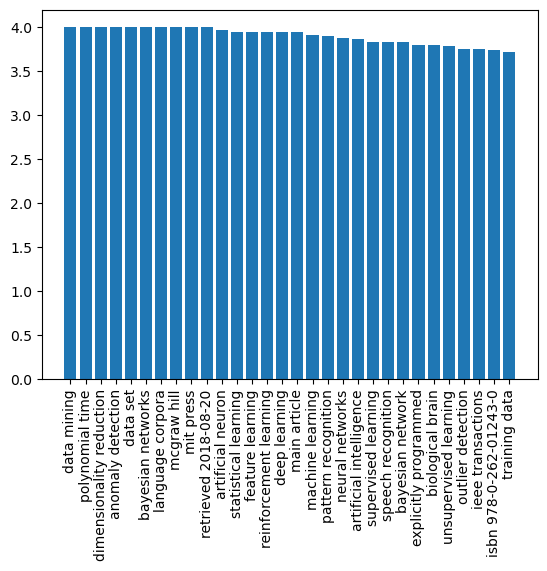

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Det finns dock ett ännu bättre sätt att visualisera ordfrekvenser - att använda **Word Cloud**. Vi behöver installera ett annat bibliotek för att skapa ett ordmoln från vår nyckelordslista.


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud`-objektet är ansvarigt för att ta emot antingen originaltext eller en förberäknad lista med ord och deras frekvenser, och returnerar en bild som sedan kan visas med hjälp av `matplotlib`:


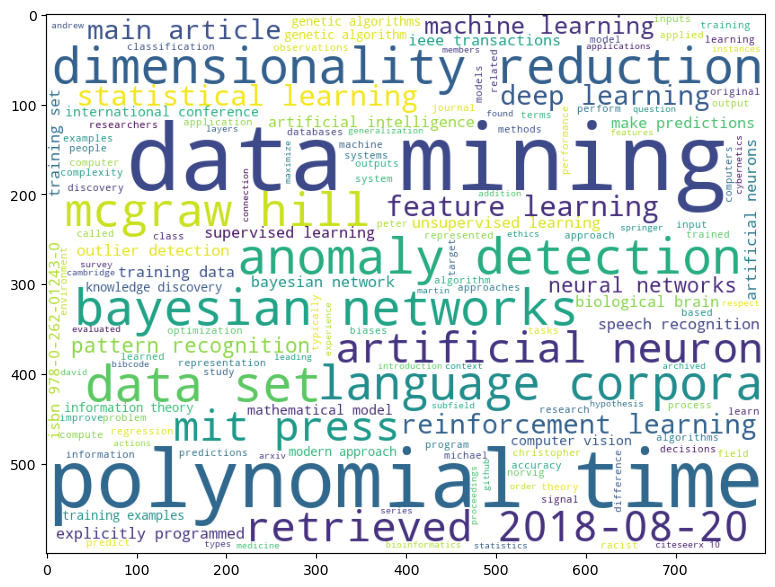

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Vi kan också skicka in den ursprungliga texten till `WordCloud` - låt oss se om vi kan få ett liknande resultat:


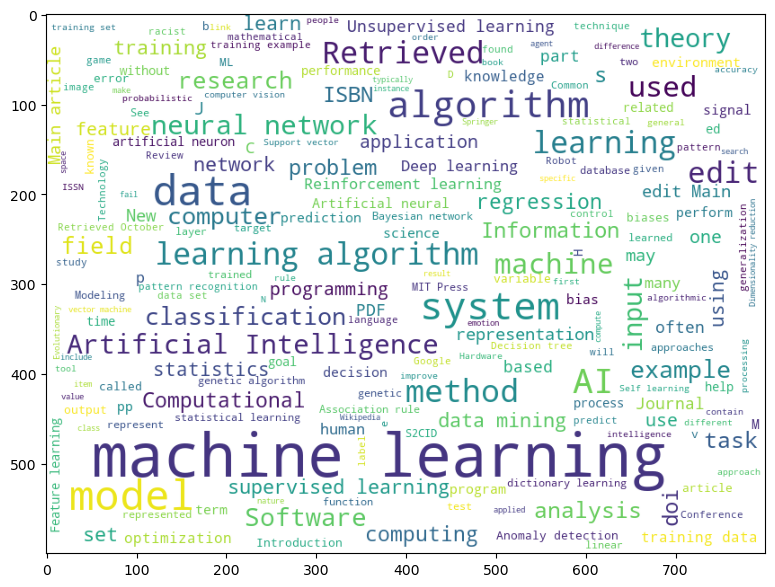

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Du kan se att ordmolnet nu ser mer imponerande ut, men det innehåller också mycket brus (t.ex. orelaterade ord som `Retrieved on`). Dessutom får vi färre nyckelord som består av två ord, såsom *data scientist* eller *computer science*. Detta beror på att RAKE-algoritmen gör ett mycket bättre jobb med att välja ut bra nyckelord från texten. Detta exempel illustrerar vikten av datarensning och förbehandling, eftersom en tydlig bild i slutändan gör det möjligt för oss att fatta bättre beslut.

I denna övning har vi gått igenom en enkel process för att extrahera viss mening från Wikipedia-text, i form av nyckelord och ordmoln. Detta exempel är ganska enkelt, men det visar tydligt alla typiska steg en data scientist tar när de arbetar med data, från datainsamling till visualisering.

I vår kurs kommer vi att diskutera alla dessa steg i detalj.



---

**Ansvarsfriskrivning**:  
Detta dokument har översatts med hjälp av AI-översättningstjänsten [Co-op Translator](https://github.com/Azure/co-op-translator). Även om vi strävar efter noggrannhet, vänligen notera att automatiska översättningar kan innehålla fel eller felaktigheter. Det ursprungliga dokumentet på dess originalspråk bör betraktas som den auktoritativa källan. För kritisk information rekommenderas professionell mänsklig översättning. Vi ansvarar inte för eventuella missförstånd eller feltolkningar som uppstår vid användning av denna översättning.
